<a href="https://colab.research.google.com/github/ArmanMarzban/MachineLearning2024/blob/main/Chapter1/Levenberg_marquardt_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

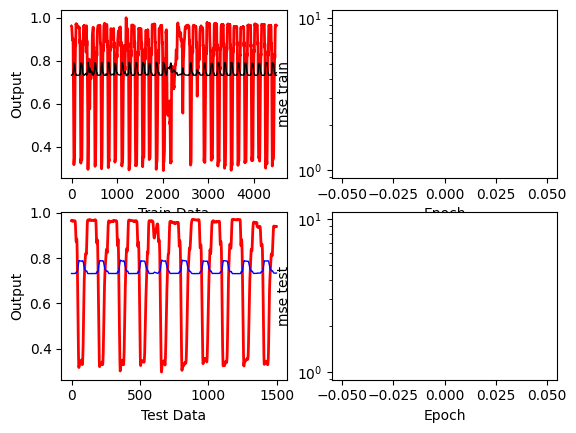

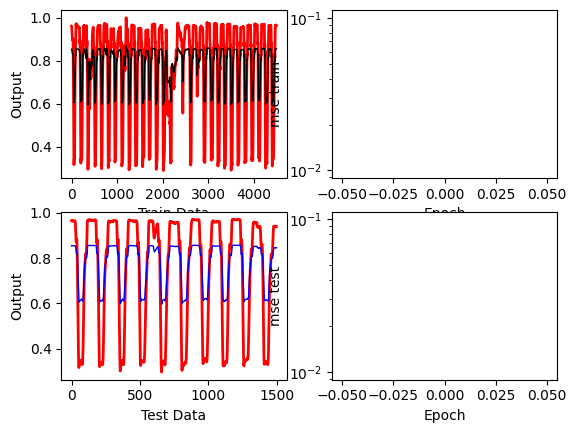

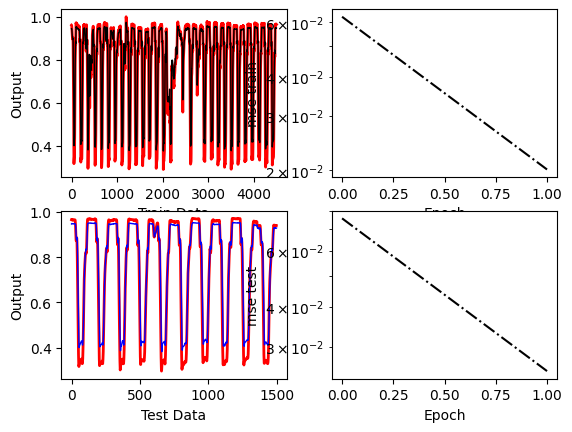

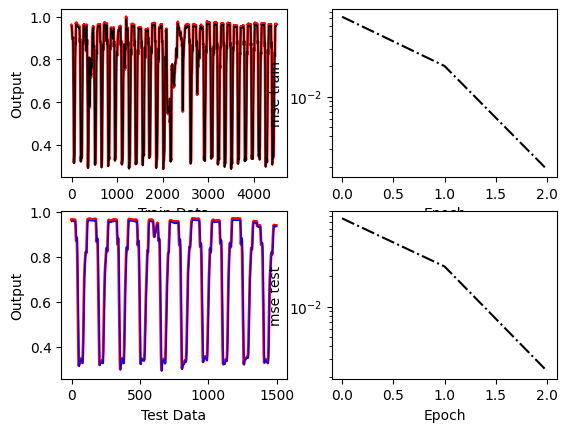

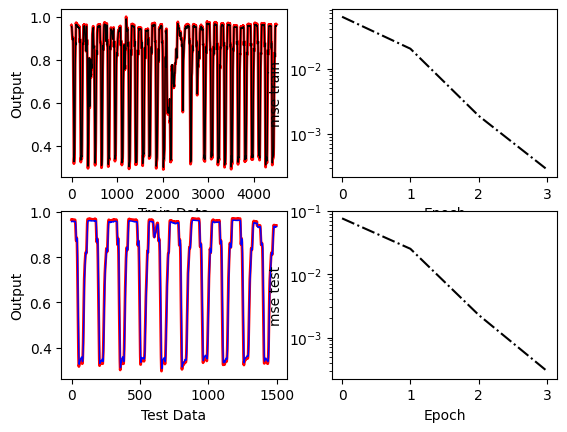

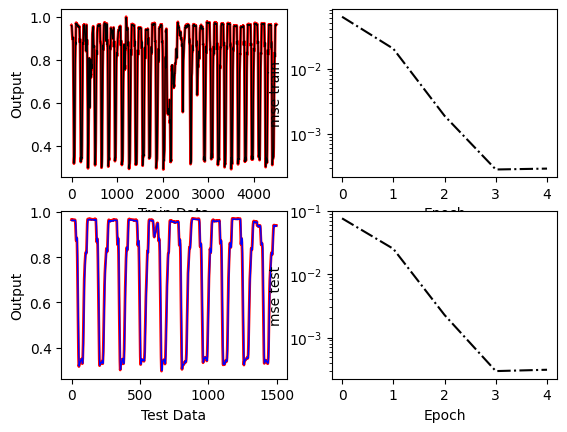

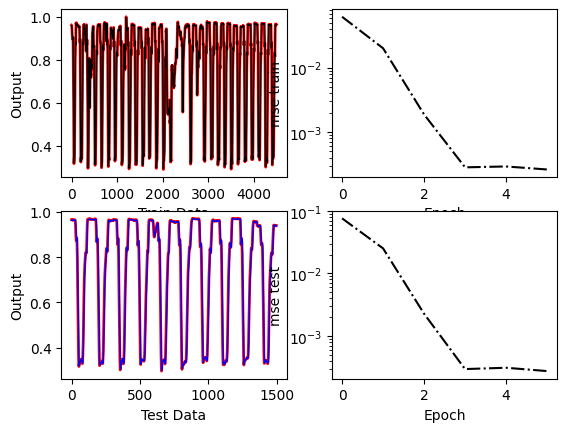

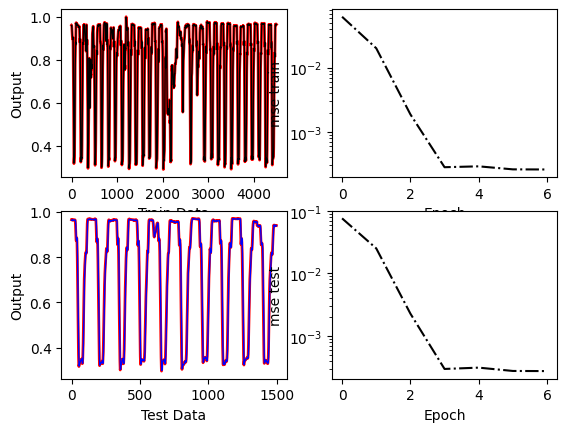

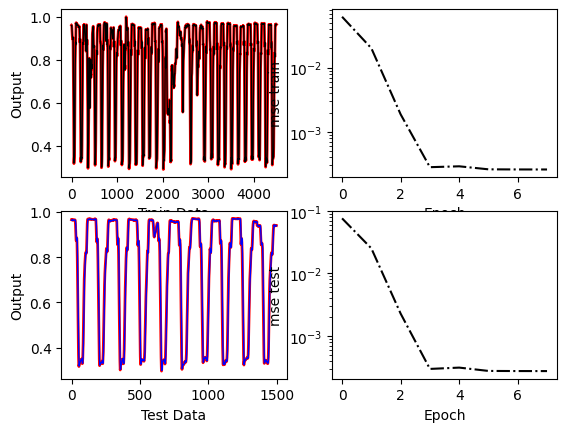

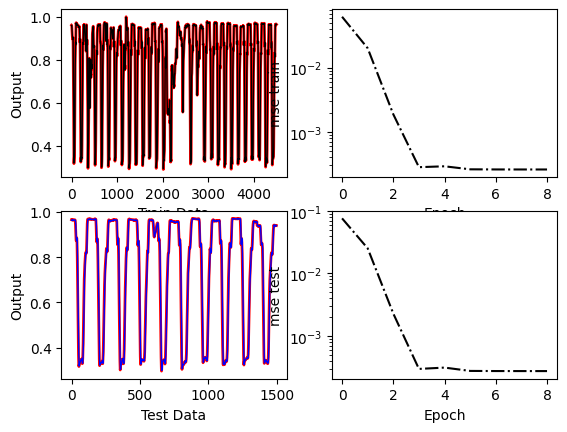

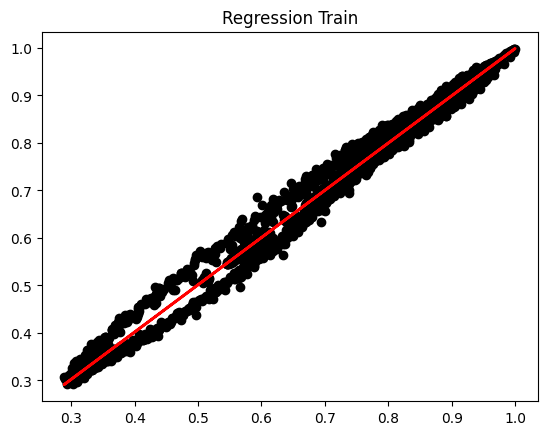

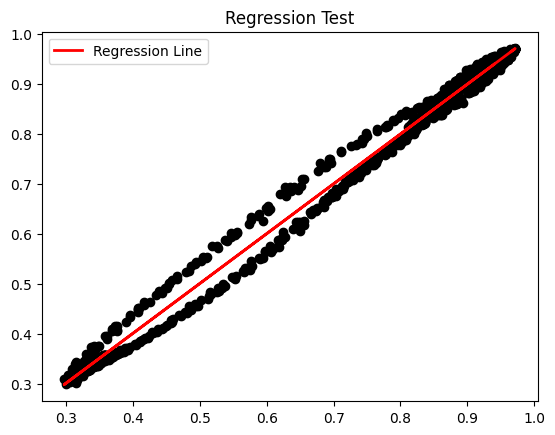

In [ ]:
# Levenberg_marquardt_Time_series (Python)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.read_excel('Video surveillance Dataset.xlsx').values
num_data = data.shape[0]  # number of data rows

# normalize the data
for ii in range(2):
    data[:, ii] = data[:, ii] / np.max(data[:, ii])

percent_train = 0.75
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n1 = 1   # number of inputs
n2 = 100  # number of neurons on layer1
n3 = 20  # number of neurons on layer2
n4 = 1  # number of output

eta = 0.01  # learning rate

epoch = 10
# Create matrix for each error
mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

a = -1
b = 1

w1 = np.random.uniform(a, b, (n2, n1))
net1 = np.zeros(n2)
o1 = np.zeros(n2)
pw1 = np.zeros((n2, n1))

w2 = np.random.uniform(a, b, (n3, n2))
net2 = np.zeros(n3)
o2 = np.zeros(n3)
pw2 = np.zeros((n3, n2))

w3 = np.random.uniform(a, b, (n4, n3))
net3 = np.zeros(n4)
o3 = np.zeros(n4)
pw3 = np.zeros((n4, n3))

w_par = np.zeros((num_train, n2 * n1 + n3 * n2 + n4 * n3))  # This is jacobi
I = np.eye(n2 * n1 + n3 * n2 + n4 * n3)

for t in range(epoch):
    error = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i,0:1]
        net1 = np.dot(w1, input_data)
        o1 = 1 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1)
        o2 = 1 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2)
        o3 = net3
        target = data[i, 1]
        error[i] = target - o3

        t1 = o2 * (1 - o2)
        A = np.diag(t1)

        t2 = o1 * (1 - o1)
        B = np.diag(t2)

        pw1 = -1 * np.dot(np.dot(w3, A), np.dot(w2, B)).T * input_data
        pw2 = -1 * np.dot(w3, A).T * o1
        pw3 = -1 * o2

        a = pw1.flatten()
        b = pw2.flatten()
        c = pw3.flatten()
        w_par[i, :] = np.concatenate((a, b, c))

    a1 = w1.flatten()
    b1 = w2.flatten()
    c1 = w3.flatten()

    w_par1 = np.concatenate((a1, b1, c1))

    miu = 1 * np.dot(error, error.T)
    w_par1 = (w_par1 - np.dot(np.dot(np.linalg.inv(np.dot(w_par.T, w_par) + miu * I), w_par.T), error.T)).T

    a2 = w_par1[0:n2 * n1]
    b2 = w_par1[n2 * n1:n2 * n1 + n3 * n2]
    c2 = w_par1[n2 * n1 + n3 * n2:n2 * n1 + n3 * n2 + n4 * n3]

    w1 = np.reshape(a2, (n2, n1))
    w2 = np.reshape(b2, (n3, n2))
    w3 = np.reshape(c2, (n4, n3))

    error_data_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, 0:1]
        net1 = np.dot(w1, input_data)
        o1 = 1 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1)
        o2 = 1 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2)
        o3 = net3
        target = data[i, 1]
        output_data_train[i] = o3
        error_data_train[i] = target - o3
    mse_train[t] = np.mean(np.square(error_data_train))

    error_data_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, 0:1]
        net1 = np.dot(w1, input_data)
        o1 = 1 / (1 + np.exp(-net1))
        net2 = np.dot(w2, o1)
        o2 = 1 / (1 + np.exp(-net2))
        net3 = np.dot(w3, o2)
        o3 = net3
        target = data[num_train + i, 1]
        output_data_test[i] = o3
        error_data_test[i] = target - o3

    mse_test[t] = np.mean(np.square(error_data_test))
    #

# Create a linear regression model
    model = LinearRegression()
    model1 = LinearRegression()
    model.fit(data[0:num_train, 1].reshape(-1, 1), output_data_train.reshape(-1, 1))
    model1.fit(data[num_train :num_data, 1].reshape(-1, 1), output_data_test.reshape(-1, 1))



    plt.figure(1)
    plt.subplot(2, 2, 1)
    plt.plot(data[0:num_train, 1],'r', linewidth=2)
    plt.plot(output_data_train, '-k', linewidth=1)
    plt.xlabel('Train Data')
    plt.ylabel('Output')
    # plt.show()

    plt.subplot(2, 2, 2)
    plt.semilogy(mse_train[0:t],'-.k')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')
    # plt.show()

    plt.subplot(2, 2, 3)
    plt.plot(data[num_train + 1:num_data, 1],'r', linewidth=2)
    plt.plot(output_data_test, 'b', linewidth=1)
    plt.xlabel('Test Data')
    plt.ylabel('Output')
    # plt.show()

    plt.subplot(2, 2, 4)
    plt.semilogy(mse_test[0:t],'-.k')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')
    plt.show()


plt.figure(2)
plt.scatter(data[0:num_train, 1], output_data_train, color='black')
plt.plot(data[0:num_train, 1], model.predict(data[0:num_train, 1].reshape(-1, 1)), color='red', label="Regression Line",linewidth=2)
plt.title('Regression Train')

plt.show()


plt.figure(3)
plt.scatter(data[num_train :num_data, 1], output_data_test,color='black')
plt.plot(data[num_train :num_data, 1], model1.predict(data[num_train :num_data, 1].reshape(-1, 1)), color='red', label="Regression Line",linewidth=2)
plt.title('Regression Test')
plt.legend()
plt.show()

mse_train_result = mse_train[epoch - 1]
mse_test_result = mse_test[epoch - 1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have converted regression predictions to classes
predicted_classes = output_data_train  # Define your conversion function
actual_classes = data[0:num_train, 3]  # Replace with your actual test labels

# Define the number of classes
num_classes = 3  # Modify this based on your classification

# Create a confusion matrix-like matrix
confusion_matrix = np.zeros((num_classes, num_classes))

# Fill the confusion matrix
for actual, predicted in zip(actual_classes, predicted_classes):
    confusion_matrix[actual][predicted] += 1

# Plot the confusion matrix
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Annotate the plot with numbers
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(int(confusion_matrix[i, j])), fontsize=12, ha='center', va='center')  # Corrected

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))

plt.show()


IndexError: ignored